# Part 2-3 PageRank

In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [2]:
set.seed(0)
g1 = sample_pa(1000, m = 4, directed = T)

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [4]:
random_walk_tele = function (g, num_steps, start_node, transition_matrix = NULL, tele){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        # teleportation
        if (runif(1, 0, 1) < tele)
            v = sample(1:vcount(g), 1)
    }
    
    return(v)
}

In [21]:
graph = g1
transition_matrix = create_transition_matrix(graph)
probvec = integer(vcount(graph))
steps = 100
for (start_node in sample(1:vcount(graph), vcount(graph))) {
    v_last = random_walk_tele(graph, steps, start_node, transition_matrix, tele = 0)
    probvec[v_last] = probvec[v_last] + 1
}

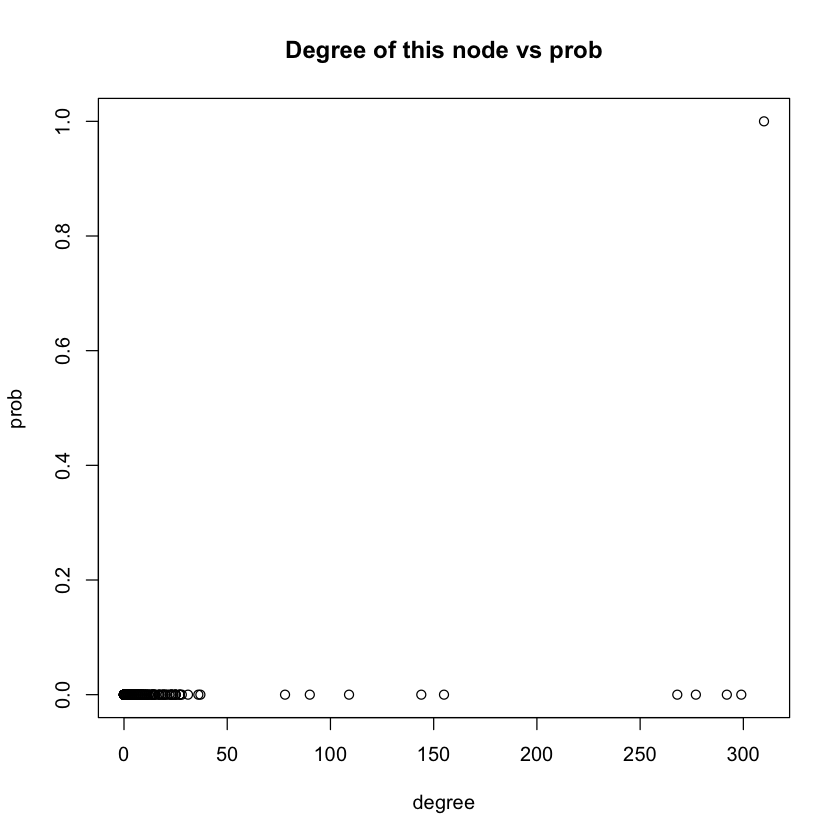

In [22]:
prob = probvec / 1000
node_degree = degree(g1, mode = 'in')
plot(node_degree, prob, main = 'Degree of this node vs prob', xlab = 'degree', ylab = 'prob')
#hist(node_degree, probability = T)

## (b)

In [7]:
graph = g1
transition_matrix = create_transition_matrix(graph)
probvec = integer(vcount(graph))
steps = 100
for (start_node in sample(1:vcount(graph), vcount(graph)))  {
    v_last = random_walk_tele(graph, steps, start_node, transition_matrix, tele = 0.15)
    probvec[v_last] = probvec[v_last] + 1
}

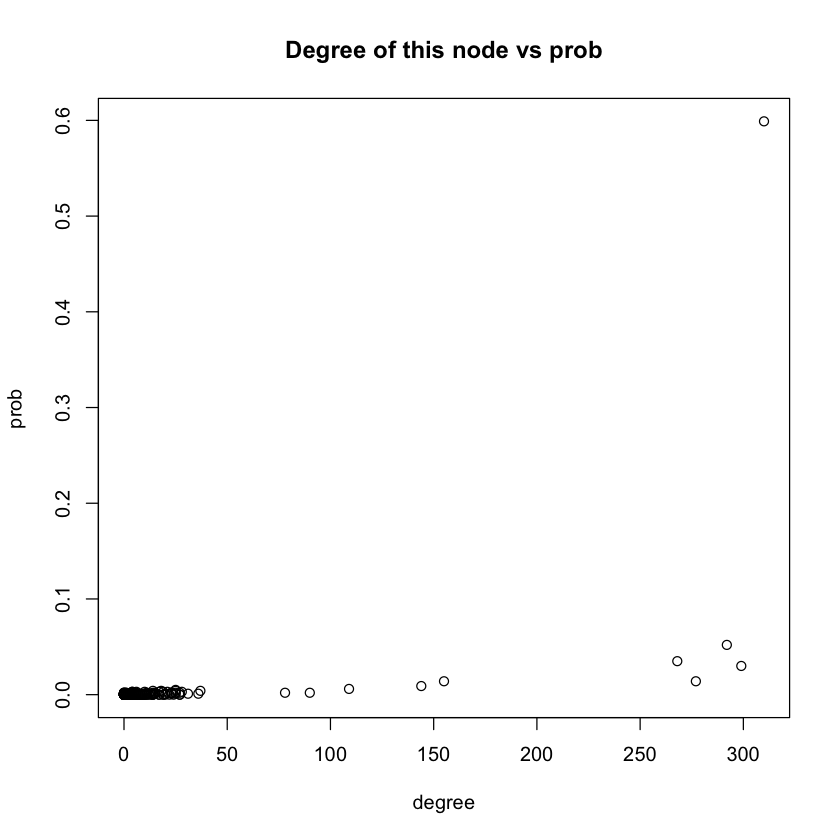

In [8]:
prob2 = probvec / 1000
node_degree = degree(g1, mode = 'in')
plot(node_degree, prob2, main = 'Degree of this node vs prob', xlab = 'degree', ylab = 'prob')

In [27]:
sort(prob2)

[1] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [13] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [25] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [37] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [49] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [61] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [73] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [85] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [97] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [109] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [121] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [157] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [169] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [181] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [193] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [205] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [217] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [229] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [241] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [253] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [265] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [277] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [289] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [301] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [313] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [325] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [337] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [349] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [361] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [373] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [385] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [397] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [409] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [421] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [433] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [445] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [457] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [469] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [481] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [493] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [505] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [517] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [529] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [541] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [553] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [565] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [577] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [589] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [601] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.00

# Part 2-4 Personalized PageRank

In [9]:
prob3 = page_rank(g1, directed = TRUE, damping = 0.85, personalized = prob2)$vector

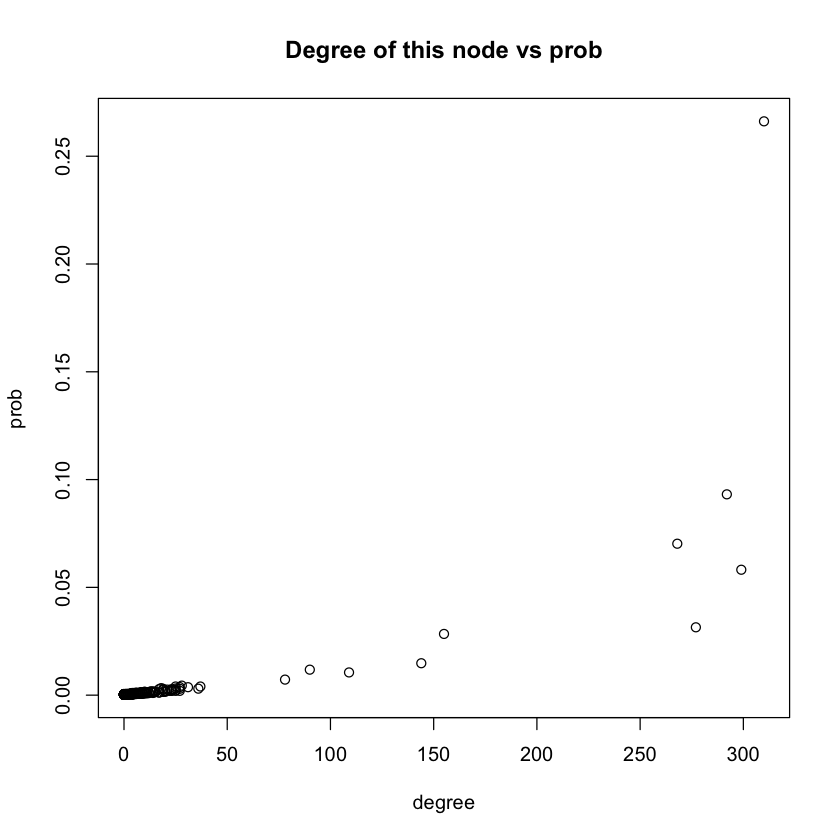

In [10]:
plot(node_degree, prob3, main = 'Degree of this node vs prob', xlab = 'degree', ylab = 'prob')

### b

In [12]:
# get two median index
order(prob3)[500]
order(prob3)[501]

[1] 473

[1] 481

In [13]:
random_walk_telemedian = function (g, num_steps, start_node, transition_matrix = NULL, tele){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        # teleportation
        if (runif(1, 0, 1) < tele)
            if (runif(1, 0, 1) <= 0.5)
                v = 473
            if (runif(1, 0, 1) > 0.5)
                v = 481
    }
    
    return(v)
}

In [14]:
graph = g1
transition_matrix = create_transition_matrix(graph)
probvec = integer(vcount(graph))
steps = 100
for (start_node in sample(1:vcount(graph), vcount(graph))) {
    v_last = random_walk_telemedian(graph, steps, start_node, transition_matrix, tele = 0.15)
    probvec[v_last] = probvec[v_last] + 1
}

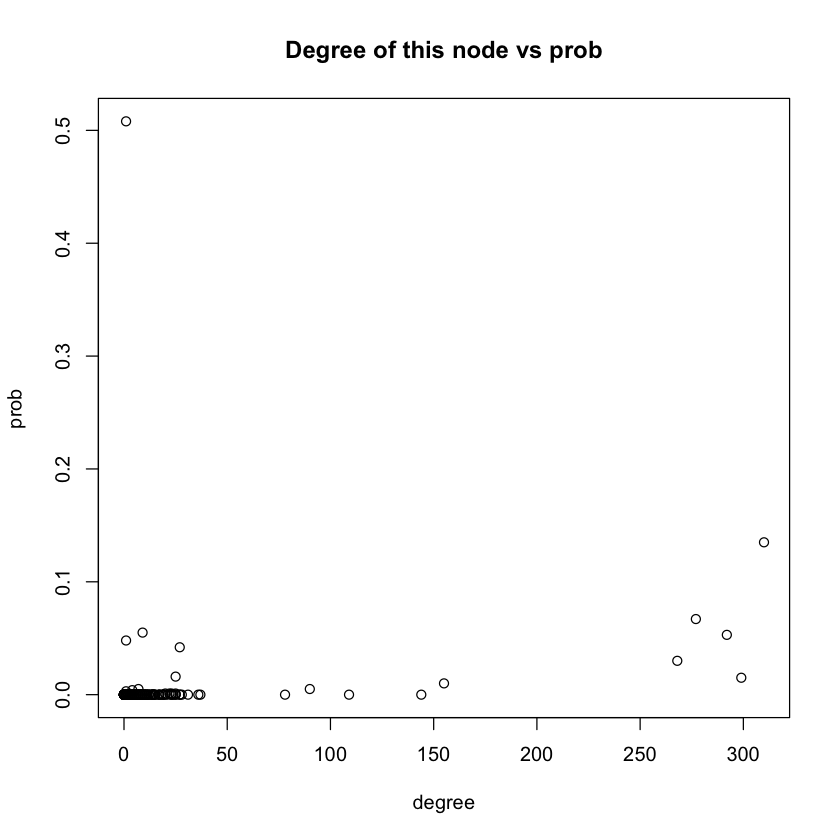

In [17]:
prob4 = probvec / 1000
node_degree = degree(g1, mode = 'in')
plot(node_degree, prob4, main = 'Degree of this node vs prob', xlab = 'degree', ylab = 'prob')

In [18]:
prob4[473]
prob4[481]

[1] 0.048

[1] 0.508